# Lecture 2 - Introduction to Python, Random Experiments and Simulations

## 1. Jupyter Notebooks

The Jupyter notebook is a browser-based graphical interface to the **IPython** shell, and builds on it a rich set of dynamic display capabilities.

As well as executing Python/IPython statements, the notebook allows the user to include formatted text, static and dynamic visualizations, mathematical equations, and much more. Furthermore, these documents can be saved in a way that lets other people open them and execute the code on their own systems.

Though the IPython notebook is viewed and edited through your web browser window, it must connect to a running Python process in order to execute code. This process (known as a "kernel") can be started by running one of the following ways: 

### How to open Jupyter
I will do a quick demonstration on how I open Jupyter Notebooks. There's no right way to do it, only your way. 
* Using Jupyter Notebook prompt (**my preferred way**)
* Using Anaconda prompt (**probably the most popular or included in many textbooks**)
* Using Anaconda Navigator

### Creating new files & Jupyter Environment

I will demonstrate how to create new files with Python 3 kernels and review Jupyter Environment.

### Getting Extensions

I have installed extra Jupyter functionalities supported by [Nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html). It includes a wide [list of functionalities](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions.html) that you may find useful. **This is not required!**

## 2. Introduction to Python (continued)

Let's take a look at how we can customize and stylize our visualizations using ```Matplotlib```.

The first thing we need to do is import the library:

In [1]:
import matplotlib.pyplot as plt

In [2]:
squares = [] # creates an empty list
vals = []

for x in range(10,20):
    vals+=[x]
    squares+=[x**2]

On top of the normal Python syntax, IPython has *magic commands*, that are prefixed by the ```%``` character. There are many [magic commands](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html), these are particularly useful when using Matplotlib:

In [3]:
# will create static images of your plot embedded in the notebook

%matplotlib inline

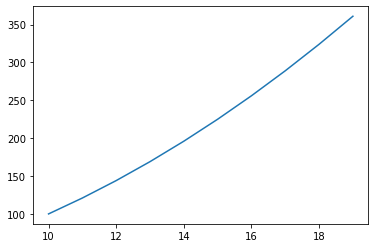

In [4]:
plt.plot(vals, squares);

In [5]:
# will create interactive plots embedded within the notebook

%matplotlib notebook

In [6]:
plt.plot(vals, squares)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# will create static plots outside the notebook

%matplotlib qt5

In [8]:
plt.plot(vals, squares);

<IPython.core.display.Javascript object>

In [9]:
%matplotlib inline

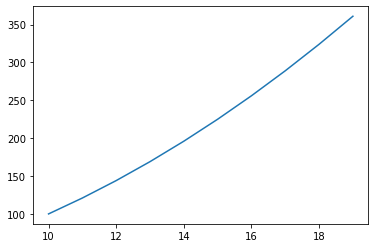

In [10]:
plt.plot(vals, squares);

Note that this ```plot``` interpolates among the data points. I.e., we can look at an $x$ value of 14.5 and see that the corresponding $y$ value is around 200. But those values *do not exist* in the data.

* Our choice of plot depends a lot on what we want to convey. If our data is sub-sampled from a continuous function (as in this case), then we probably want interpolation.

* If we just want to see the data points, then we can instead use scatter plot:

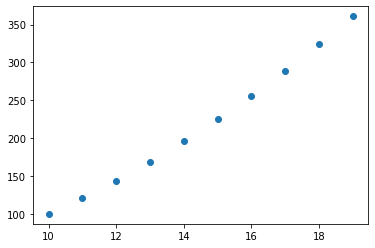

In [11]:
plt.scatter(vals, squares);

Sometimes, we may want a contiuous function with the $y$-values held constant (known as zero-order hold) until the next data point.

* That is a step or staircase plot:

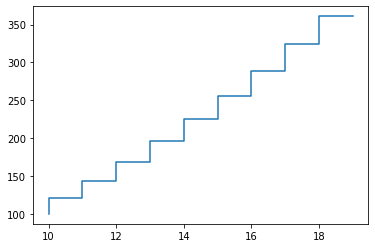

In [12]:
plt.step(vals, squares);

Bar plots are usually used to show counts of items:

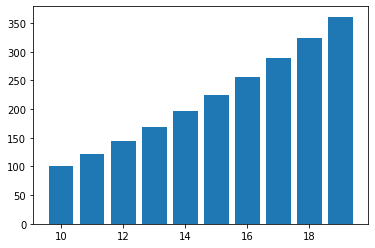

In [13]:
plt.bar(vals, squares);

We can [**style**](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html) these plots in many different ways, and we will learn about the most important ways as we go through the class.

* A quick way to change your plot style is:

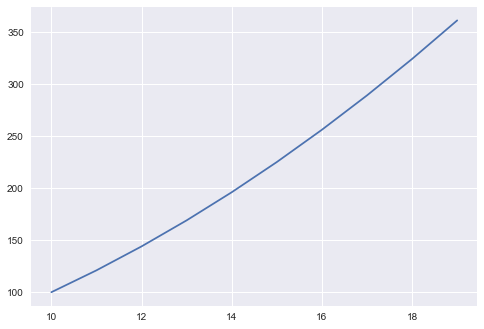

In [14]:
plt.style.use('seaborn')

plt.plot(vals, squares);

A style sheet reference for Matplotlib 3.1.2 is here:
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

### Reading Source

FYI, chapter 4 "Visualization with Matplotlib" from the online book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) by Jake VanderPlas is a great resource to learn more about different types of plots, customize legends and colorbars, adding text annotations and more.

## 3. Random Experiments

What is a random experiment?

<div class="alert alert-info" role="alert">
  <strong>Definition</strong> 
    
A <strong>random experiment</strong> is an experiment for which the outcome is not completely predictable to an observer based on the observer's knowledge of the system and its inputs.
</div>

<div class="alert alert-info" role="alert">
  <strong>Definition</strong>
    
An <strong>outcome</strong> is a non-decomposable result (or output) of a random experiment.
</div>

Examples:

1. Outcomes of flipping a coin: H, T

2. Outcomes of rolling a die: 1,2,3,4,5,6
    * example that is not an outcome: even=2 or 4 or 6 (decomposable)

3. Outcomes for temperature: real numbers
    * example that is not an outcome: >=90 

4. Outcomes for favorite color

<div class="alert alert-info" role="alert">
  <strong>Definition</strong>
    
The set of all possible outcomes of a random experiment is called the <strong>sample space</strong> (or sometime the <strong>universal set</strong>). The sample space is denoted by $S$ or $\Omega$.
</div>

(A **set** is an unordered collection of *unique* items. More information on sets and set operations will be posted to the course website.)

### Random Experiment example

Let's consider the following experiment:

Given a coin:

1. What is the sample space for 1 flip of the coin? {H, T}

2. What is the sample space look like for 20 flips of the coin? {all possible ($x_1$,$x_2$,$\dots$,$x_{20}$) where each $x_i$ is in $\{H,T\}$}

<div class="alert alert-info" role="alert">
  <strong>Definition</strong>
    
A set of outcomes $E \subset S$ (meaning $E$ is a subset of $S$) is called an <strong>event</strong>. We say that an event $E$ occurs if any of the outcomes in $E$ is the result of the experiment.
</div>

Examples:

* A die comes up even $E=\{2,4,6\}$
* The temperature is less than 40 degrees $E=(-\infty, 40)$

<div class="alert alert-info" role="alert">
  <strong>Definition</strong>
    
The <strong>event class</strong> is the set of all events to which we assign probability. For our purposes, it is a set of subsets of $S$. 
</div>

If $S$ is finite, then the event class can be taken to be the power set of $S$ (the set of **all** subsets of $S$).

Examples:

* What is the event class for flipping a coin? { {H}, {T}, {H,T}, null} 
* What is the event class for rolling a die? {null, {1}, {2},..., {6}, {1,2}, {1,3}, ..., {1,6}, ..., {6,6}, {1,2,3},...}

## 4. First Random Experiment and Simulations

Consider the following questions:

1. **If you flip a coin 20 times, how many times do you think it will come up heads?**

2. **If you flip the coin 20 times and it comes up heads 6 times, do you think it is a *fair* or *unfair* coin? How *confident* can you be in your answer?**

* Can you conduct an experiment to answer these questions? 

* What problems may you encounter in conducting this experiment? How can we overcome these problems?

Answers:
1. We expect the answer will be about 10 because the coin will come up heads one-half the time.

2. We don't know yet how to answer this.

If we take a **fair coin** and flip it 20 times and count the number of heads, and then **repeat the experiment many times**, we can **estimate** how often 6 or fewer heads occurs. If it occurs very rarely (say, less than 5% of the time, then we can say that the coin is unlikely to be fair).

*Here we use 6 or fewer heads because if 5 heads occurs, that is an even  more extreme outcome than 6 heads occurring, and so we want to count up how often we see an outcome as extreme OR MORE as 6 heads occurring.*

* The **problem** is that we may need to repeat the experiment (of flipping the coin 20 times) many times to accurately estimate how often 6 or fewer heads come up. This may require thousands of coin flips!

We can overcome this problem by using a computer to flip the coin in a **simulation**. A **computer simulation** is a computer program that models reality and allows us to conduct experiments that:

* would require a lot of time to carry out in real life
* would require a lot of resources to carry out in real life
* would not be possible to repeat in real life (for instance, simulation of the next day's weather or stock market performance)

Let's build simulations of our coin flip experiment and learn about some Python libraries:

In [15]:
# Simple library for working with random phenomena

import random

In [16]:
# Create our sample space -- here we use a list instead of a set
# as the Python object to represent S

faces=['H','T']

In [17]:
random.choice(faces) #flipping

'T'

In [18]:
random.choices?

In [19]:
random.choices(faces, k=20)

['H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T']

In [20]:
coins = random.choices(faces, k=20)

In [21]:
coins.count('H')

11

Running this repeatedly is a pain! Fortunately, the computer can automatically run it for us:

In [22]:
num_sims = 25
flips = 20

for sim in range(num_sims):
    coins = random.choices(faces, k=20)
    num_heads = coins.count('H')
    print(sim,': ',num_heads, ' Heads')

0 :  10  Heads
1 :  9  Heads
2 :  11  Heads
3 :  12  Heads
4 :  13  Heads
5 :  13  Heads
6 :  11  Heads
7 :  10  Heads
8 :  9  Heads
9 :  10  Heads
10 :  5  Heads
11 :  13  Heads
12 :  9  Heads
13 :  9  Heads
14 :  8  Heads
15 :  8  Heads
16 :  10  Heads
17 :  7  Heads
18 :  7  Heads
19 :  13  Heads
20 :  8  Heads
21 :  11  Heads
22 :  11  Heads
23 :  7  Heads
24 :  12  Heads


Suppose we want to see how often 6 or fewer heads occurs. We can reduce the printing by only printing those extreme events:

In [23]:
num_sims = 25
flips = 20

for sim in range(num_sims):
    coins = random.choices(faces, k=20)
    num_heads = coins.count('H')
    if num_heads <= 6:
        print(sim,': ',num_heads, ' Heads')

10 :  6  Heads


* We really don't care about the particular experiment on which those events occur. Instead, we are really just looking at the **frequency** of those events.

<div class="alert alert-info" role="alert">
  <strong>Definition</strong>
    
The <strong>relative frequency</strong> of an event is the number of times that an event occurs divided by the number of times the experiment is conducted. 
</div>

Let's modify the experiment to calculate the relative frequency of getting 6 or fewer heads on 20 flips of a fair coin:

In [24]:
num_sims = 25
flips = 20
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=20)
    num_heads = coins.count('H')
    if num_heads <= 6:
        event_count +=1
        
print('Relative frequency of 6 or fewer heads is ',event_count/num_sims)

Relative frequency of 6 or fewer heads is  0.0


**How does the relative frequency change with the *number of experiments* simulated?**

* For 1M simulated experiments, what is the relative frequency of 6 or fewer heads?

In [25]:
num_sims = 1000000
flips = 20
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=20)
    num_heads = coins.count('H')
    if num_heads <= 6:
        event_count +=1
        
print('Relative frequency of 6 or fewer heads is ',event_count/num_sims)

Relative frequency of 6 or fewer heads is  0.058112


* For 1M simulated experiments, what is the relative frequency of 4 or fewer heads?

In [26]:
num_sims = 1000000
flips = 20
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <= 4:
        event_count +=1
        
print('Relative frequency of 4 or fewer heads is ',event_count/num_sims)

Relative frequency of 4 or fewer heads is  0.005994


* What is your conclusion about whether this could be a fair coin?

### Binary Hypothesis Testing

This is an example of **binary hypothesis testing**. In this case, we set up two hypothesis:

<div class="alert alert-info">
    <b>Hypothesis Test</b>
    
$H_0$: (the *null hypothesis*) is that the observed effect is just caused by randomness in the sampling. It is not real in the underlying system or data. For this exampe, our null hypothesis is that the coin is actually fair.

$H_1$: (the *alternative hypothesis*) is that the observed effect is not just caused by random sampling. In this example, the coin is biased toward Tails.
</div>

In *classical statistics* when conducting hypothesis testing, we say that an effect is **<span style="color:blue">statistically significant</span>** if the relative frequency/probability of observing an effect of that size under the null hypothesis is **smaller than some small threshold value $\alpha$**. 

* Typical values of $\alpha$ are 0.05 or 0.01, but many argue for even smaller values now. 

* **The threshold $\alpha$ to determine statistical significance must always be determined before the experiment is conducted -- otherwise, there is too much temptation to adjust the threshold based on the observed relative frequency.**

* The measured relative frequency of the observed effect is called the **<span style="color:blue">$p$-value</span>**.

In classical hypothesis testing, we do *not* test the alternative hypothesis directly, nor can we utilize side information that we may already have about the two hypotheses.

Assume that we decide $\alpha=0.05$. 

$H_0$: the coin is fair
$H_1$: the coin is unfair

**Case 1:**
*fairness* is equivalent of seeing 7 or more.
*unfair* is equivalent of seeing 6 or fewer.

In [27]:
num_sims = 1000000
flips = 20
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <= 6:
        event_count +=1
        
print('Relative frequency of 6 or fewer heads is ',event_count/num_sims)

Relative frequency of 6 or fewer heads is  0.057922


Conclusion: the p-value is larger than $\alpha$, this means we cannot reject the null hypothesis (the coin is fair)

**Case 2:**
*fairness* is equivalent of seeing 5 or more.
*unfair* is equivalent of seeing 4 or fewer.

In [28]:
num_sims = 1000000
flips = 100
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <= 4:
        event_count +=1
        
print('Relative frequency of 4 or fewer heads is ',event_count/num_sims)

Relative frequency of 4 or fewer heads is  0.0


Conclusion: the p-value is smaller than $\alpha$, this is statistically significant. This means we reject the null hypothesis, the coin is unfair.